# Dataset CIFAR10

In [1]:
from keras.datasets import cifar10
import pandas as pd
import numpy as np

### Carregando e Separando dataset

In [2]:
dataset = cifar10.load_data()

170500096/170498071 [==============================] - 38s 0us/step


In [7]:
(x_train, y_train), (x_test, y_test) = dataset

### Visualizando os dados


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

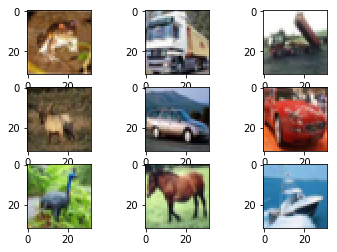

In [20]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

### Normalizando os dados


In [21]:
# Normalizando os dados
x_train = x_train.astype('f') / 255.0
x_test = x_test.astype('f') / 255.

In [23]:
# Ideal era utilizar o keras.utils.to_category()
# y_train = utils.to_category(y_train)

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

### Criando o Modelo


In [71]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense
from keras.models import Sequential
import keras.backend as K

In [74]:
K.image_data_format()

'channels_last'

In [46]:
input_Shape = (32, 32, 3)

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = input_Shape, activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

opt = 'sgd'

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

### Image Data Genarator

In [47]:
from keras.preprocessing.image import ImageDataGenerator

In [48]:
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
                         width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
                         horizontal_flip=True, fill_mode="nearest")

In [49]:
dataset_train = aug.flow(x_train, y_train, batch_size=64)

In [50]:
steps = int(x_train.shape[0] / 64)

H = model.fit_generator(dataset_train, steps_per_epoch=steps, epochs=50, 
                        validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
781/781 [==============================] - 497s 637ms/step - loss: 2.1509 - acc: 0.2878 - val_loss: 1.5134 - val_acc: 0.4479
Epoch 2/50
781/781 [==============================] - 495s 634ms/step - loss: 1.7092 - acc: 0.3760 - val_loss: 1.4885 - val_acc: 0.4592
Epoch 3/50
781/781 [==============================] - 491s 629ms/step - loss: 1.5979 - acc: 0.4119 - val_loss: 1.4497 - val_acc: 0.4676
Epoch 4/50
781/781 [==============================] - 495s 634ms/step - loss: 1.5305 - acc: 0.4417 - val_loss: 1.3814 - val_acc: 0.4945
Epoch 5/50
781/781 [==============================] - 492s 630ms/step - loss: 1.4711 - acc: 0.4635 - val_loss: 1.3498 - val_acc: 0.5114
Epoch 6/50
781/781 [==============================] - 499s 640ms/step - loss: 1.4325 - acc: 0.4789 - val_loss: 1.3552 - val_acc: 0.5125
Epoch 7/50
781/781 [==============================] - 494s 632ms/step - loss: 1.3885 - acc: 0.4993 - val_loss: 1.3615 - val_acc: 0.5126
Epoch 8/50
781/781 [============================

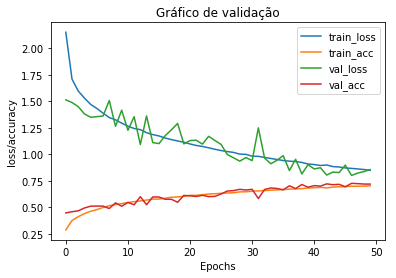

In [69]:
plt.figure()
plt.plot(H.history['loss'], label='train_loss')
plt.plot(H.history['acc'], label='train_acc')
plt.plot(H.history['val_loss'], label='val_loss')
plt.plot(H.history['val_acc'], label='val_acc')
plt.title('Gráfico de validação')
plt.xlabel("Epochs")
plt.ylabel("loss/accuracy")
plt.legend()
plt.show()


In [70]:
scores = model.evaluate(x_test, y_test)
print("loss: ", scores[0])
print("acc: ", scores[1])

10000/10000 [==============================] - 75s 8ms/step
loss:  0.8558133193016052
acc:  0.7197


In [57]:
preds = model.predict_classes(x_test)

In [62]:
preds = lb.fit_transform(preds)

In [64]:
from sklearn import metrics

/home/matheusjerico/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [67]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1000
           1       0.85      0.90      0.87      1000
           2       0.85      0.41      0.56      1000
           3       0.70      0.38      0.49      1000
           4       0.74      0.60      0.66      1000
           5       0.75      0.57      0.65      1000
           6       0.47      0.96      0.63      1000
           7       0.72      0.86      0.78      1000
           8       0.90      0.83      0.86      1000
           9       0.75      0.92      0.83      1000

   micro avg       0.72      0.72      0.72     10000
   macro avg       0.75      0.72      0.71     10000
weighted avg       0.75      0.72      0.71     10000
 samples avg       0.72      0.72      0.72     10000

